In [1]:
import numpy as np
from pyrisk.metric_uncertainty import VolatilityEstimation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from pyrisk.models import lending_club_model
from pyrisk.datasets import lending_club

### Loading Data

Loading test data from lending club

In [2]:
# loading a dummy model
model = lending_club_model()

# loading original data
data = lending_club(modelling_mode = False)[0]
y = data[['default']]
X = data.drop(['id', 'loan_issue_date','default'], axis = 1)

# defining the metrics we are interested in
evaluators =  {'AUC' : [roc_auc_score,'proba'], 'ACC' : [accuracy_score,'class']}

### Running Uncertainty Evaluation

Running the Uncertainty Evaluation

In [3]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'boot_seed')

# running 1000 random samples with 40% of data assigned to test partition
checker.estimate(0.4,100)

### Investigating Uncertainty Evaluation

Plotting distribution of the metrics and summary statistics

In [4]:
# First getting the data back
checker.metrics_list['AUC']

array([[0.9250194 , 0.70100568, 0.22401371],
       [0.91563322, 0.71208749, 0.20354573],
       [0.91704761, 0.67380763, 0.24323998],
       [0.90224686, 0.69025871, 0.21198816],
       [0.93510604, 0.72716192, 0.20794412],
       [0.91855899, 0.70841042, 0.21014857],
       [0.91674641, 0.70897047, 0.20777594],
       [0.9326679 , 0.69344799, 0.2392199 ],
       [0.91445698, 0.69799104, 0.21646594],
       [0.90920622, 0.71896589, 0.19024032],
       [0.90662098, 0.7083779 , 0.19824308],
       [0.91478889, 0.68474731, 0.23004158],
       [0.91835747, 0.71010623, 0.20825124],
       [0.8990797 , 0.72374018, 0.17533952],
       [0.92700009, 0.72392928, 0.20307081],
       [0.92760464, 0.69483789, 0.23276675],
       [0.91517199, 0.70353134, 0.21164065],
       [0.92253761, 0.74141254, 0.18112507],
       [0.9154026 , 0.68626608, 0.22913652],
       [0.92414651, 0.70074914, 0.22339737],
       [0.9151235 , 0.72146866, 0.19365484],
       [0.91728199, 0.7245363 , 0.19274569],
       [0.

In [5]:
checker.reporting('AUC')

Mean of metric on train is 0.92
Mean of metric on test is 0.71
Mean of delta is 0.21
Standard Deviation of metric on train is 0.01
Standard Deviation of metric on test is 0.02
Standard Deviation of delta is 0.02


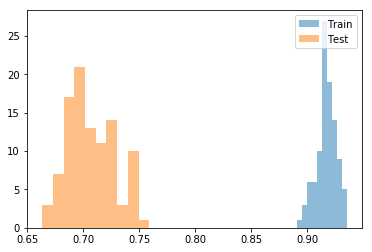

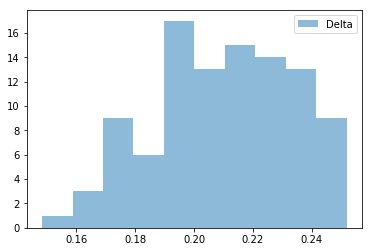

In [6]:
checker.plot('AUC')

In [7]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'boot_global')

# running 1000 random samples with 40% of data assigned to test partition
checker.estimate(0.4)

In [10]:
# First getting the data back
checker.metrics_list['AUC'][:,0]

array([0.95450107, 0.98109032, 0.99056617, 0.99486738, 0.99673878,
       0.99760276, 0.99821544, 0.99920027, 0.99962602, 0.99954509,
       0.99985285, 0.9998615 , 0.99982967, 0.99998821, 0.99997456,
       0.99998502, 1.        , 1.        , 1.        , 0.99996838,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [12]:
checker.reporting('AUC')

Mean of metric on train is 1.0
Mean of metric on test is 0.6
Mean of delta is 0.39


In [13]:
checker.plot('AUC')

UnboundLocalError: local variable 'train' referenced before assignment